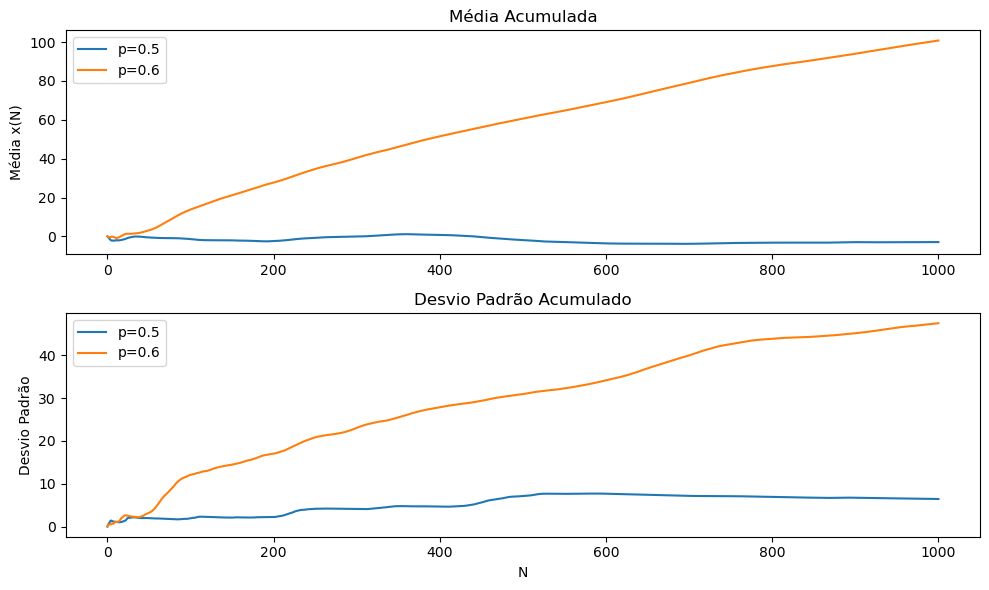

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

class PasseioAleatorio:
    def __init__(self, p, N):
        """
        Parâmetros:
        p (float): Probabilidade de movimento para a direita
        N (int): Número de passos no passeio
        """
        self.p = p
        self.N = N
    
    def função_passeio(self):
        """
        Gera um passeio aleatório usando rng.choice() e np.cumsum()
        
        Retorna:
        array: Posições do passeio aleatório
        """
        rng = np.random.default_rng()
        passos = rng.choice([1, -1], size=self.N, p=[self.p, 1-self.p])
        x = np.concatenate(([0], np.cumsum(passos)))
        return x

p = [0.5, 0.6]        

plt.figure(figsize=(10, 6))

for prob in p:
    valores = PasseioAleatorio(prob, 1000)
    valores_posicao = valores.função_passeio()
    media_pontos = []
    desvios_padrao = []
    soma = 0
    
    #Lista para armazenar valores anteriores ao longo do passeio
    valores_parciais = []
    
    #média acumulada em cada ponto
    for i in range(len(valores_posicao)):
        soma += valores_posicao[i]
        media = soma / (i + 1)
        media_pontos.append(media)
        
        valores_parciais.append(valores_posicao[i])
        
        #desvio padrão acumulativo usando np.std
        desvio_padrao = np.std(valores_parciais)
        desvios_padrao.append(desvio_padrao)

    #média
    plt.subplot(2, 1, 1)
    plt.plot(range(len(media_pontos)), media_pontos, label=f'p={prob}')
    plt.ylabel('Média x(N)')
    plt.title('Média Acumulada')
    plt.legend()

    #desvio padrão
    plt.subplot(2, 1, 2)
    plt.plot(range(len(desvios_padrao)), desvios_padrao, label=f'p={prob}')
    plt.xlabel('N')
    plt.ylabel('Desvio Padrão')
    plt.title('Desvio Padrão Acumulado')
    plt.legend()

plt.tight_layout()
plt.show()

# Segundo jeito de fazer o desvio padrão 

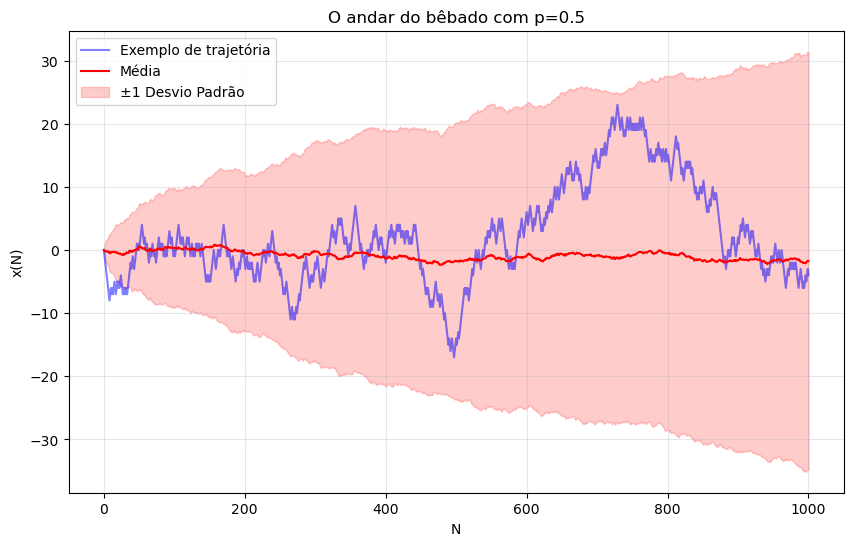

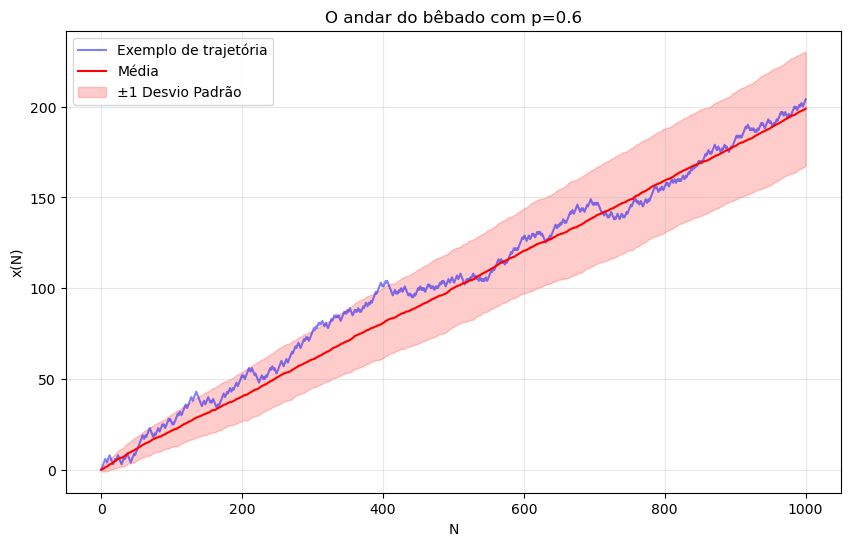

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PasseioAleatorio:
    def __init__(self, p, N):
        """
        Parâmetros:
        p (float): Probabilidade de movimento para a direita
        N (int): Número de passos no passeio
        """
        self.p = p
        self.N = N
    
    def função_passeio(self):
        """
        Gera um passeio aleatório usando rng.choice() e np.cumsum()
        
        Retorna:
        array: Posições do passeio aleatório
        """
        rng = np.random.default_rng()
        passos = rng.choice([1, -1], size=self.N, p=[self.p, 1-self.p])
        x = np.concatenate(([0], np.cumsum(passos)))
        return x

# Parâmetros da simulação
N = 1000
valores_p = [0.5, 0.6]
num_simulacoes = 100

# Para cada valor de probabilidade
for p_valor in valores_p:
    # Matriz para armazenar todos os passeios
    todos_passeios = np.zeros((num_simulacoes, N+1))
    
    # Gerar múltiplos passeios usando a classe
    for i in range(num_simulacoes):
        passeio = PasseioAleatorio(p_valor, N)
        todos_passeios[i] = passeio.função_passeio()
    
    media = np.mean(todos_passeios, axis=0)
    desvio = np.std(todos_passeios, axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(todos_passeios[0], 'b-', alpha=0.5, label='Exemplo de trajetória')
    plt.plot(media, 'r-', label='Média')
    plt.fill_between(range(N+1), media-desvio, media+desvio, color='r', alpha=0.2, label='±1 Desvio Padrão') #A cor em volta do gráfico
    
    plt.ylabel('x(N)')
    plt.xlabel('N')
    plt.legend()
    plt.title(f'O andar do bêbado com p={p_valor}')
    plt.grid(True, alpha=0.3)
    
    # Salvar dados
    np.savez(f'Dados_passeio_p_{p_valor}', 
             valores_posicao=todos_passeios[0], 
             media=media, 
             desvio_padrao=desvio, 
             p=p_valor)
    
    plt.show()